# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [33]:
#Random selection of latitude and longitude 

lat = np.random.choice(range(-90,90),2000)
lng = np.random.choice(range(-180,180),2000)

lat_lng = pd.DataFrame({"Lat":lat,"Long":lng})        

#print(len(lat_lng)
lat_lng.head()

,Lat,Long
0,-52,125
1,11,162
2,44,96
3,49,-20
4,87,-96


In [34]:
#Use citipy to merge them to nearest city
#Create new columns for the city name: 
lat_lng["city_name"] = ""
lat_lng["country"] = ""
#LatLon.head()
for index,row in lat_lng.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Long"])
    lat_lng.set_value(index,"city_name",city.city_name)
    lat_lng.set_value(index,"country",city.country_code)

print(f"The length of the dataframe is: {len(lat_lng)}")


The length of the dataframe is: 2000


In [35]:
#Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude 

#Clean it for missing values
nr_lat_lng = lat_lng.dropna()
print(f"The length of the cleaned dataframe is:{len(nr_lat_lng)}")


nr_lat_lng = nr_lat_lng.drop_duplicates()
print(f"The length of the dataframe after dropping the duplicates is: {len(nr_lat_lng)}")

# Sample for "at least" 500 cities 
sample = nr_lat_lng.sample(699)
sample =sample.reset_index()
sample = sample.iloc[:,[1,2,3,4]]
print(f"The length of the sample is: {len(sample)}")

sample.head()


The length of the cleaned dataframe is:2000
The length of the dataframe after dropping the duplicates is: 1978
The length of the sample is: 699


,Lat,Long,city_name,country
0,-42,174,seddon,nz
1,9,113,balabac,ph
2,86,133,nizhneyansk,ru
3,-47,45,tsihombe,mg
4,-79,86,busselton,au


In [36]:
#Sample, Skip 
# List for holding lat_lngs and cities
#lat_lngs = []
#cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
 #   city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
  #  if city not in cities:
  #      cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# OpenWeatherMap API Key
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid":"c3136578f261dcd8997dca2078c01253","units":"imperial" }

#Print the base url 

print("-----------------------------------------")
print("Data Retrieval")
print("-----------------------------------------\n")

for index,row in sample.iterrows():
    params["q"] =f'{row["city_name"]},{row["country"]}'
    print(f"Processing Record {index+1} of {len(sample)} -- ")
    response = requests.get(url,params)
    print(response.url)
    formatted_response = response.json()
    try:
        sample.set_value(index,"Latitude",formatted_response.get("coord",{}).get("lat"))
        sample.set_value(index,"Longitude",formatted_response.get("coord",{}).get("lon"))
        sample.set_value(index,"Temperature",formatted_response.get("main",{}).get("temp"))
        sample.set_value(index,"Max Temperature",formatted_response.get("main",{}).get("temp_max"))
        sample.set_value(index,"Humidity",formatted_response.get("main",{}).get("humidity"))
        sample.set_value(index,"Wind speed",formatted_response.get("wind",{}).get("speed"))
        sample.set_value(index,"Cloudiness",formatted_response.get("clouds",{}).get("all"))
        sample.set_value(index,"Date",formatted_response.get("dt"))
        
    except:
       
        print (f"City not found. Skipping....")
        print ("----------------------------------------------------------------")
        continue

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

-----------------------------------------
Data Retrieval
-----------------------------------------

Processing Record 1 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=seddon%2Cnz
Processing Record 2 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=balabac%2Cph
Processing Record 3 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=nizhneyansk%2Cru
Processing Record 4 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=tsihombe%2Cmg
Processing Record 5 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=busselton%2Cau
Processing Record 6 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=sentyabrskiy%2Cru
Process

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=bredasdorp%2Cza
Processing Record 58 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=saskylakh%2Cru
Processing Record 59 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=busselton%2Cau
Processing Record 60 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=puerto+ayora%2Cec
Processing Record 61 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=nome%2Cus
Processing Record 62 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=plaridel%2Cph
Processing Record 63 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=punta+arenas%2Ccl
Processing Record 113 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=ushuaia%2Car
Processing Record 114 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=temaraia%2Cki
Processing Record 115 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=bokspits%2Cbw
Processing Record 116 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=east+london%2Cza
Processing Record 117 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=mataura%2Cpf
Processing Record 118 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=yangjiang%2Ccn
Processing Record 170 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=tasbuget%2Ckz
Processing Record 171 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=glendive%2Cus
Processing Record 172 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=lebu%2Ccl
Processing Record 173 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=avarua%2Cck
Processing Record 174 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=ushuaia%2Car
Processing Record 175 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=aqu

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=ahipara%2Cnz
Processing Record 226 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=oga%2Cjp
Processing Record 227 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=hilo%2Cus
Processing Record 228 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=saskylakh%2Cru
Processing Record 229 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=punta+arenas%2Ccl
Processing Record 230 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=tura%2Cru
Processing Record 231 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=marzuq

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=xam+nua%2Cla
Processing Record 281 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=guerrero+negro%2Cmx
Processing Record 282 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=suamico%2Cus
Processing Record 283 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=boyolangu%2Cid
Processing Record 284 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=provideniya%2Cru
Processing Record 285 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=kapaa%2Cus
Processing Record 286 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=taolanaro%2Cmg
Processing Record 340 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=ilulissat%2Cgl
Processing Record 341 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=butaritari%2Cki
Processing Record 342 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=new+norfolk%2Cau
Processing Record 343 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=albany%2Cau
Processing Record 344 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=mikhaylovskoye%2Cru
Processing Record 345 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&uni

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=punta+arenas%2Ccl
Processing Record 399 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=butaritari%2Cki
Processing Record 400 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=constitucion%2Cmx
Processing Record 401 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=cape+town%2Cza
Processing Record 402 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=rikitea%2Cpf
Processing Record 403 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=bathsheba%2Cbb
Processing Record 404 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&uni

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=cabo+san+lucas%2Cmx
Processing Record 457 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=bonthe%2Csl
Processing Record 458 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=lamesa%2Cus
Processing Record 459 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=ushuaia%2Car
Processing Record 460 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=metehara%2Cet
Processing Record 461 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=vangaindrano%2Cmg
Processing Record 462 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=avarua%2Cck
Processing Record 516 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=georgetown%2Csh
Processing Record 517 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=rio+gallegos%2Car
Processing Record 518 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=cairns%2Cau
Processing Record 519 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=saint-denis%2Cre
Processing Record 520 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=saint+george%2Cbm
Processing Record 521 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=laguna%2Cbr
Processing Record 575 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=saint-philippe%2Cre
Processing Record 576 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=mar+del+plata%2Car
Processing Record 577 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=mataura%2Cpf
Processing Record 578 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=kapaa%2Cus
Processing Record 579 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=kapaa%2Cus
Processing Record 580 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=cherskiy%2Cru
Processing Record 634 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=busselton%2Cau
Processing Record 635 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=bjelovar%2Chr
Processing Record 636 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=pangnirtung%2Cca
Processing Record 637 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=ushuaia%2Car
Processing Record 638 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=bredasdorp%2Cza
Processing Record 639 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=jamestown%2Csh
Processing Record 693 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=new+norfolk%2Cau
Processing Record 694 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=kavaratti%2Cin
Processing Record 695 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=rungata%2Cki
Processing Record 696 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=punta+arenas%2Ccl
Processing Record 697 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imperial&q=romny%2Cru
Processing Record 698 of 699 -- 
http://api.openweathermap.org/data/2.5/weather?appid=c3136578f261dcd8997dca2078c01253&units=imp

In [3]:
#Do Try  Except Method 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
#Clean the retrieved data
sample = sample.dropna()
#Create a dataframe
weatherPy = pd.DataFrame({"city_name":sample["city_name"],
                          "country":sample["country"],
                         "cloudiness":sample["Cloudiness"],
                         "humidity":sample["Humidity"],
                         "lat":sample["Latitude"],
                         "lng":sample["Longitude"],
                        "temperature":sample["Temperature"],
                          "max_temp":sample["Max Temperature"],
                         "wind speed":sample["Wind speed"],
                          "date":sample["Date"]})

weatherPy["date"]=weatherPy["date"].astype('int')
# Save as CSV
weatherPy.to_csv("weatherPy.csv")
weatherPy.count()

city_name      604
country        604
cloudiness     604
humidity       604
lat            604
lng            604
temperature    604
max_temp       604
wind speed     604
date           604
dtype: int64

In [8]:
#Sample

In [45]:
weatherPy.describe()

,cloudiness,humidity,lat,lng,temperature,max_temp,wind speed,date
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,6.040000e+02
mean,45.653974,77.177152,5.519834,1.251407,57.541026,58.290778,8.853974,1.554174e+09
std,35.896171,21.501053,40.352151,101.838604,20.239957,20.367052,5.929751,1.688128e+03
min,0.000000,13.000000,-54.810000,-175.200000,-6.870000,-6.870000,0.380000,1.554169e+09
25%,4.000000,65.000000,-33.020000,-73.760000,45.970000,48.000000,4.700000,1.554174e+09
50%,48.000000,81.000000,-0.740000,8.085000,59.900000,60.900000,6.980000,1.554175e+09
75%,76.000000,95.000000,40.565000,99.140000,73.735000,76.120000,11.817500,1.554175e+09
max,100.000000,100.000000,77.480000,179.320000,87.800000,87.800000,31.320000,1.554175e+09


In [46]:
weatherPy_plt = pd.read_csv("weatherPy.csv")
weatherPy_plt.head()

,Unnamed: 0,city_name,country,cloudiness,humidity,lat,lng,temperature,max_temp,wind speed,date
0,0,seddon,nz,12.0,65.0,-41.67,174.07,58.33,59.00,5.01,1554174282
1,1,balabac,ph,36.0,97.0,7.99,117.06,82.96,82.96,10.45,1554174805
2,4,busselton,au,0.0,32.0,-33.64,115.35,72.23,75.00,5.53,1554174724
3,7,laiyang,cn,76.0,17.0,36.98,120.70,61.00,61.00,1.99,1554174768
4,9,saint-joseph,re,0.0,69.0,-21.37,55.62,72.86,77.00,5.82,1554174129


In [5]:
#Sample

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

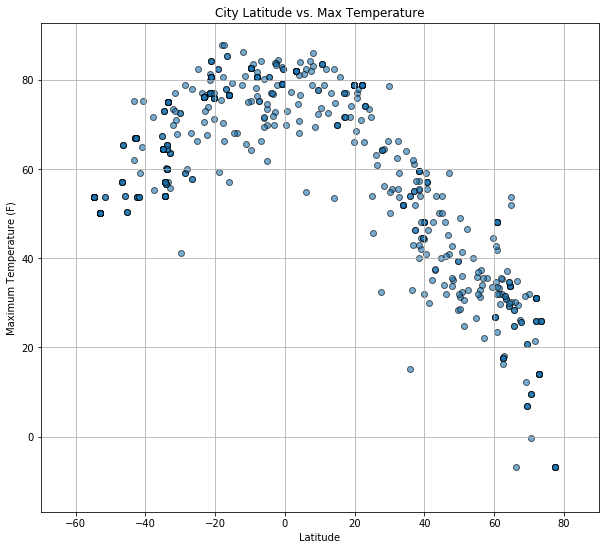

In [47]:
#Maximum Temperature(F) vs. Latitude
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['max_temp'],alpha=.6, linewidth=1, edgecolor='k')

#Set x and y limits, title, labels
ax.set_xlim(-70, 90)
ax.set_ylim(min(weatherPy_plt['max_temp'])-10, max(weatherPy_plt['max_temp'])+5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Maximum Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Temperature.png")
plt.grid()
plt.show()

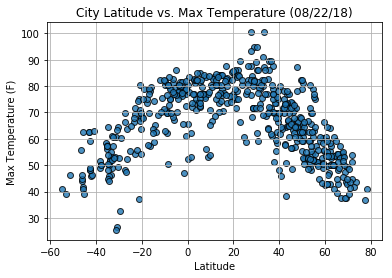

In [6]:
#Sample 

#### Latitude vs. Humidity Plot

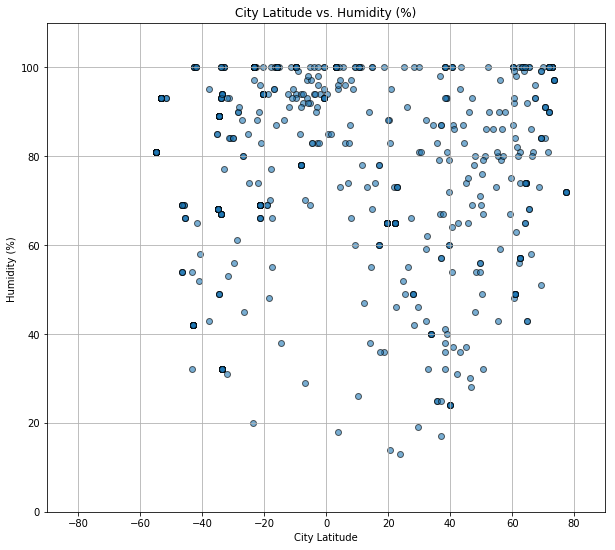

In [48]:
#Humidity vs. Latitude
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['humidity'],alpha=.6, linewidth=1, edgecolor='k')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(0,110)
ax.set_xlabel("City Latitude")
ax.set_ylabel("Humidity (%) ")
ax.set_title("City Latitude vs. Humidity (%)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Humidity.png")
plt.grid()
plt.show()


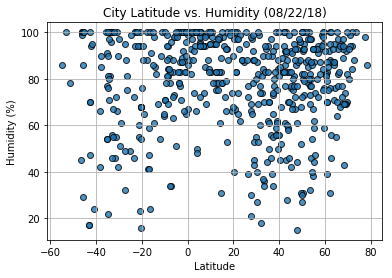

In [7]:
#Sample

#### Latitude vs. Cloudiness Plot

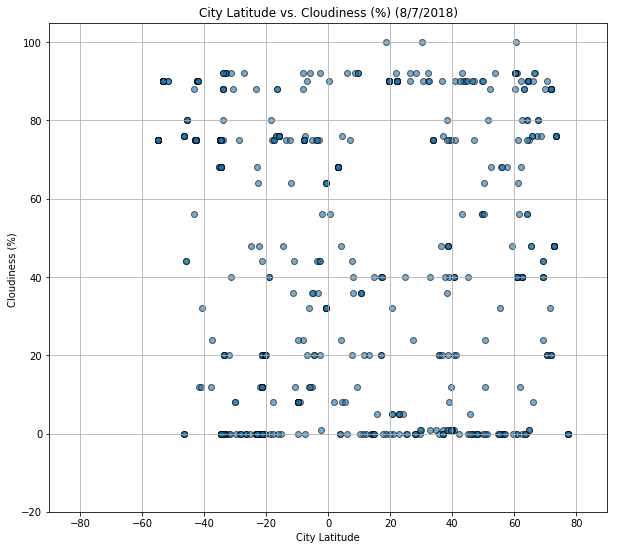

In [49]:
#Cloudiness vs. Latitude
fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['cloudiness'],alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(weatherPy_plt['cloudiness'])-20, max(weatherPy_plt['cloudiness'])+5)
ax.set_xlabel("City Latitude")
ax.set_ylabel("Cloudiness (%) ")
ax.set_title("City Latitude vs. Cloudiness (%) (8/7/2018)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Cloudiness (%).png")
plt.grid()
plt.show()

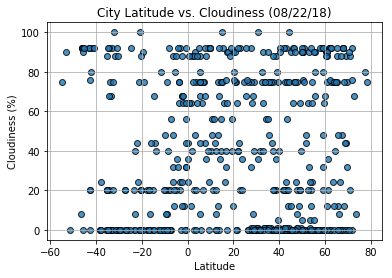

In [8]:
#Sample

#### Latitude vs. Wind Speed Plot

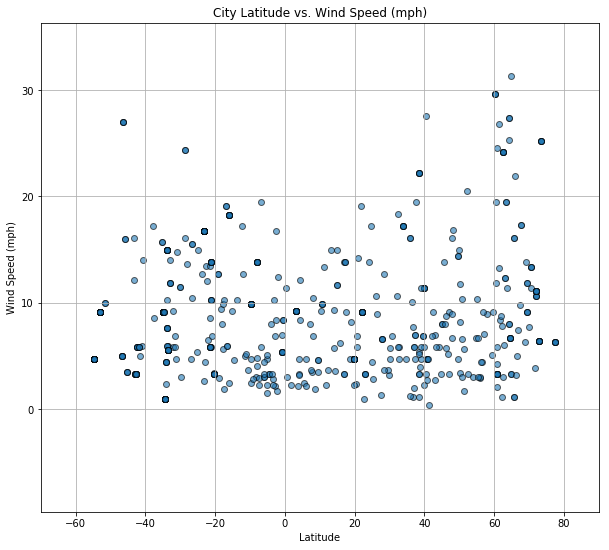

In [50]:
#Wind Speed vs. Latitude

fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy_plt['lat'], weatherPy_plt['wind speed'],alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-70, 90)
ax.set_ylim(min(weatherPy_plt['wind speed'])-10, max(weatherPy_plt['wind speed'])+5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (mph)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Wind Speed.png")
plt.grid()
plt.show()

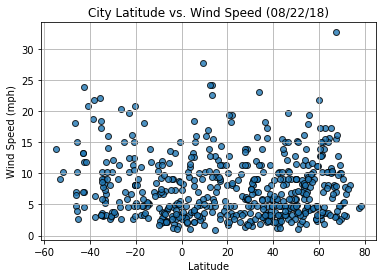

In [9]:
#Sample